## 발전 방식에 따른 발전량 비교

1. 프로젝트 목표 및 내용

이 프로젝트는 신, 재생 에너지와 원자력 발전 방식을 이용한 현재 우리나라의 발전 현황을 알아보는 것이 목표이다. 이를 위해 웹 상에서 두 가지 발전 방식에 따른 발전량에 관한 데이터를 획득한 후, python 프로그램을 통해 그들을 비교 분석하여 어느 것이 효율적인지 결론을 내리는 것이 이 프로젝트의 내용이다.

2. 주제 선정 이유 또는 이 프로젝트의 필요성

현 정부가 강력하게 밀고 있는 정책 중 하나가 탈 원전이다. 지속 가능한 발전을 위하여 원자력 발전 의존도를 점점 줄여 나가야 하는 것에는 모두가 동의할 것이다. 하지만 일각에서는 그러한 노력이 점차적으로 이루어져야 하는 반면 현 정부는 신, 재생 에너지 사업을 무리하게 밀어붙이고 있다는 비난을 하고 있다. 따라서 나는 정치적 관점을 떠나 이 프로젝트를 통해 우리나라의 원자력 의존도가 얼마나 높은지 객관적으로 알아보고 싶었다.
우리나라의 전력 현황에 관한 그래프, 도표 등은 문재인 대통령이 탈 원전 의사를 표명했을 때 여러 기사들에서 이미 수없이 다루었다. 그럼에도 내가 이 주제로 프로젝트를 진행하는 것에는 두 가지 이유가 있다.

첫째, 통계라는 것은 꼭 객관적이지만은 않다. “투입하는 자료에 무엇을 포함시킬 것인가”,“자료들은 어떤 기준으로 분류할 것인가” 등에 따라 동일한 대상을 수치화한 통계는 매우 다를 수 있다. 이 프로젝트를 통해 사각지대 없이 우리나라의 전력 현황을 분석하고 싶다.

둘째, 무질서하게 나열된 데이터를 누구나 쉽게 의미를 파악할 수 있는 형태로 가공하는 과정에서 코딩 실력을 늘리고 싶다. 대학에 입학하여 3개월 남짓한 시간 동안 배운 지식으로는 뭔가 대단하고 새로운 창작물을 만들기가 불가능하다고 판단했다. 코로나 맵 제작이나 대기 내 미세먼지 분석을 다루는 학우들을 보았는데, 이런 기능을 하는 소프트웨어들은 이미 시중에 있다. 내 프로젝트의 결과물도 이미 많이 나와 있는 상태지만, 남의 도움 없이 내 것을 만들어 보며 성장하는 과정 자체에 의의를 두려 한다.

3. 데이터 획득

Term_Project_2020.ipnyb에 명시된 정부 3.0 공공 데이터 사이트에서 한국수력원자력㈜의 원전 호기별 발전량 및 이용률, 그리고 한국 수자원 공사에서 제공하는 수력, 태양광, 조력, 풍력 방식의 발전량을 획득할 계획이다. 가능하다면 현 정부가 탈 원전 정책의 롤 모델로 삼는 독일의 전력 현황까지 분석해 보고 싶은데, 이를 위해서 독일 통계청에서 제공되어 있는 관련 자료를 찾아 놓았다. 밑에 링크를 걸어 놓은 파일에는 CSV 파일, XML을 이용한 파일, 표 형식으로 된 데이터가 있다.

원전 호기별 발전량 및 이용률 - http://www.data.go.kr/data/15002302/fileData.do

한국수자원공사 발전소별 운영현황 - http://www.data.go.kr/data/15038200/openapi.do

독일 전력생산량(독일 통계청) - https://www.destatis.de/EN/Themes/Economic-Sectors-Enterprises/Energy/Production/Tables/gross-electricity-production.html

4. 구현 내용 설명

한국수자원공사의 발전소별 운영현황은 XML파일로, 2019년도 자료도 포함되어 있지만 독일 통계청 자료와 원자력 관련 자료가 2018년까지밖에 없기 때문에 비교를 위해 2018년에 해당하는 부분을 추출하였다.

1)	우선 데이터를 제공하는 사이트에 회원 가입 후 인증 키를 받아서 URL에 인증 키를 넣고 웹 창에 검색한다. 그러면 얻으려 했던 데이터들이 쭉 나오는데, 자료의 구조를 대강 파악한다.

2)	본격적으로 python 언어를 타이핑하기 전에 후에 있을 작업을 위해 pandas와 bs4, requests, numpy 모듈들을 import 해 놓는다. 

3)	request.urlopen으로 웹의 자료를 받아오고 BeautifulSoup로 파싱을 한다.

4)	가공되지 않은 xml파일의 자료를 직관적으로 다룰 수 있게 PowerPlant라는 class를 만들었다. for loop와 함수 soup.find_all()을 이용하여 xml 파일의 모든 item들을 PowerPlant타입 object로 변환했다.

이때 사용한 태그들에 관한 설명은 다음과 같다
-elcpwstnNm: 발전소의 이름
-elcpwstnClsCd: 발전 방식(수력, 풍력 등)
-r2: 실제 발전량(단위는 mWh)
-stdrDe: 조사 기간

5)	Plant_list는  이 PowerPlant들에 관한 list이다. 이 list의 element를 하나씩 잡아 if조건문을 거쳐 날짜에 따라 분류되도록 한다. 이것은 월별 수치를 나타내기 위해 거친 과정이다.

6)	신재생 에너지에 관한 월별 발전량의 list가 만들어졌다. 여기에 2018년 합계와 독일 통계청 자료의 수치를 extend를 통해 추가한다. dataframe의 column 개수와 자료 개수를 맞추기 위함이다. 

7) csv 파일로 제공되어 있는 2018년 원자력 발전소 운영현황에서 csvreader로 발전량만을 뽑아낸다. 이 자료는 월별로 나뉘어져 있지 않고 2018년 합계가 발전소별로 이미 제공되어 있다.

8) Pandas 모듈을 이용하여 가로 세로축을 적절하게 설정하고 결과 분석을 위한 표를 만든다.

5. 분석 결과
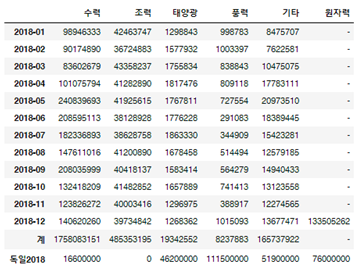

수력, 조력, 기타 신재생 에너지를 통해 얻은 전력량은 우리나라가 독일보다 높았다. 특이한 점은 독일의 조력 발전량이 0으로 나타난다는 것인데, 자료가 잘못된 것인가 싶어서 위키백과에 찾아보니 조력 발전이 효과적이려면 환경이 상당히 특수적이어야 해서 현재 가동중인 조력 발전소가 세계에 몇 곳 없다고 한다.

https://en.wikipedia.org/wiki/List_of_tidal_power_stations

독일 면적은357,386 제곱 km로 100,210 제곱 km인 남한 면적의 3배나 가까이 되기 때문에 필요한 전력량과 생산해야 하는 전력량이 월등히 높을줄 알았는데 세계 에너지 통계에 따르면 2018년 대한민국은 593 TWh(9위), 독일은 647 TWh(7위)으로 생각보다 큰 차이가 나지 않아서 놀랐다.

https://yearbook.enerdata.co.kr/electricity/world-electricity-production-statistics.html

그 이유가 무엇일까 생각해보니 한국은 제곱 km당 515명(16위), 독일은 제곱 km당 230명(34위)으로 인구 밀도에서 큰 차이가 있기 때문이라는 것을 자료조사를 통해서 확인하였다. 

https://ko.wikipedia.org/wiki/%EC%9D%B8%EA%B5%AC_%EB%B0%80%EB%8F%84%EC%88%9C_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D

처음에는 한국 수력원자력공사에서 제공한 원전 호기별 발전량 및 이용률이 2018년 한 해 동안 원전들의 발전량을 나타낸 줄 알았다. 도출된 자료를 보니 원자력 발전에 의한 전력량이 신재생 에너지 발전량들을 합한 값에 못 미치는 것을 보고 csv파일을 다시 확인하니 이름 끝에 20181231이라는 숫자가 붙어 있었다. 설마 했는데 12월 한 달 동안의 발전량을 나타낸 자료인 것 같다. 이에 12라는 숫자를 곱해 연간 원자력 발전량 예상치를 계산해 보면 1,602,063,144‬mWh라는 수가 나온다. 독일은 과거에 탈워전을 선언했었기 때문에 이 숫자와 차이가 크다는 것을 확인할 수 있다.

6. 결론

출처와 파일 형식이 다른 3개 자료를 통합하여 비교 분석을 하려던 계획을 성공적으로 달성하였다. 원전 호기별 발전량 자료는 xml 형식으로도 제공되었지만 앞서 계획서에서 밝혔듯 코딩 실력 향상이 목표이기 때문에 csv파일을 읽어들이는 방식을 택하여 자료 수집의 다양성을 높였다.

7. 오픈 소스를 활용한 부분 명시

.extend 모듈이 생각나지 않아 stackoverflow를 찾아봤었다. bs4과 pandas는 처음 사용해 보는 기능들이었기 때문에 여러 블로그와 웹페이지들에서 사용방법을 검색했다. 각각의 방법들을 사용해보고 가장 간단한 형식이 되도록 짜깁기 하여 작성하였다. csv파일을 read하는 부분의 코드는 실습자료에서와 동일한 코드이다. 그 외에 Powerplant 클래스를 만들거나 if를 이용하여 월별로 Powerplant object들을 분류하는 작업, for을 이용하여 xml의 item들을 Powerplant object로 변환하거나 합계를 구하는 과정의 코드는 내가 직접 구현한 코드들이다.

8. 참고문헌

http://hleecaster.com/python-web-crawling-with-beautifulsoup/

http://blog.naver.com/PostView.nhn?blogId=hymne&logNo=221685990250&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

https://eunjin3786.tistory.com/146

https://doorbw.tistory.com/172

https://stackoverflow.com/questions/20196159/how-to-append-multiple-values-to-a-list-in-python

https://korbillgates.tistory.com/94